# **PRACTICA NLP**


## Descarga de los datos, instalación y ejecución de las librerias.

In [1]:
import os
import json
import gzip
import pandas as pd
import random
import numpy as np

from urllib.request import urlopen
from google.colab import drive

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Descargo los datos completos ya que el 5-core daba muchos fallos a la hora del preprocesado
#!wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFiles/Musical_Instruments.json.gz

In [3]:
# Conecto al drive y guardo el archivo

drive.mount('/content/drive')

#!cp Musical_Instruments.json.gz /content/drive/MyDrive/Musical_Instruments.json.gz


Mounted at /content/drive


In [4]:
file_path = "/content/drive/MyDrive/Musical_Instruments.json.gz"

# Cargar el archivo
df = pd.read_json(file_path, lines=True, compression='gzip')


In [5]:
def plot_word_cloud(text):
    text = [str(item) for item in text]
    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


## EDA

In [6]:
# Tamaño del dataframe

df.shape

(1512530, 12)

In [7]:
df.head(10)

,overall,vote,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,image
0,5,90,False,"08 9, 2004",AXHY24HWOF184,0470536454,{'Format:': ' Paperback'},Bendy,Crocheting for Dummies by Karen Manthey & Susa...,Terrific Book for Learning the Art of Crochet,1092009600,NaN
1,4,2,True,"04 6, 2017",A29OWR79AM796H,0470536454,{'Format:': ' Hardcover'},Amazon Customer,Very helpful...,Four Stars,1491436800,NaN
2,5,NaN,True,"03 14, 2017",AUPWU27A7X5F6,0470536454,{'Format:': ' Paperback'},Amazon Customer,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO,Five Stars,1489449600,NaN
3,4,NaN,True,"02 14, 2017",A1N69A47D4JO6K,0470536454,{'Format:': ' Paperback'},Christopher Burnett,My girlfriend use quite often,Four Stars,1487030400,NaN
4,5,NaN,True,"01 29, 2017",AHTIQUMVCGBFJ,0470536454,{'Format:': ' Paperback'},Amazon Customer,Arrived as described. Very happy.,Very happy.,1485648000,NaN
5,5,NaN,True,"01 4, 2017",A1J8LQ7HVLR9GU,0470536454,{'Format:': ' Kindle Edition'},Iheartmanatees,Love the Dummies Series. Never fails.,Love the Dummies Series,1483488000,NaN
6,5,NaN,True,"01 2, 2017",ABVTZ63S6GOWF,0470536454,{'Format:': ' Paperback'},D. Eva,Good book.,Five Stars,1483315200,NaN
7,4,NaN,True,"12 21, 2016",A2HX9NFBXGSWRW,0470536454,{'Format:': ' Paperback'},Stoeffels,Just started reading it. Love the charts & cau...,Clear. Good reminders.,1482278400,NaN
8,4,NaN,True,"12 20, 2016",AP1TQR64HQRCI,0470536454,{'Format:': ' Paperback'},nan ekelund,GREAT book,Four Stars,1482192000,NaN
9,5,NaN,True,"12 15, 2016",A37FC9MED20AO,0470536454,{'Format:': ' Paperback'},Jacqueline Bryant,this is a very helpful book.,Five Stars,1481760000,NaN


In [8]:
# Aqui vemos las columnas con información.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512530 entries, 0 to 1512529
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   overall         1512530 non-null  int64 
 1   vote            243948 non-null   object
 2   verified        1512530 non-null  bool  
 3   reviewTime      1512530 non-null  object
 4   reviewerID      1512530 non-null  object
 5   asin            1512530 non-null  object
 6   style           672538 non-null   object
 7   reviewerName    1512380 non-null  object
 8   reviewText      1511675 non-null  object
 9   summary         1512150 non-null  object
 10  unixReviewTime  1512530 non-null  int64 
 11  image           30165 non-null    object
dtypes: bool(1), int64(2), object(9)
memory usage: 128.4+ MB


### Distribución de reviews por sentimiento

In [9]:
# Números de reviews por estrella

counts = df['overall'].value_counts()
print(counts)


5    984097
4    237295
1    118102
3    106249
2     66787
Name: overall, dtype: int64


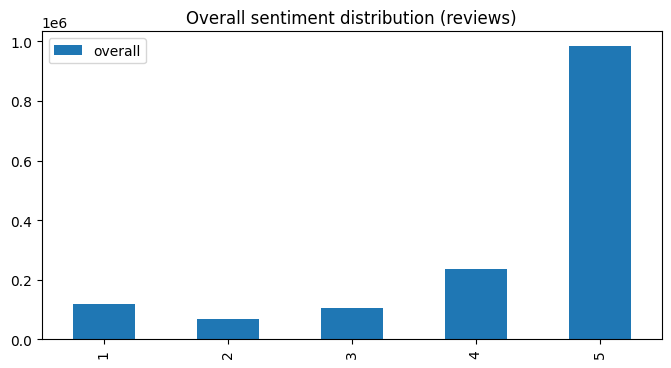

In [10]:
# Gráfica de la distribución de reviews por número de estrellas.

aux_df = pd.DataFrame(df['overall'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (reviews)', figsize=(8, 4))

In [11]:
# Nos quedamos con las dos columnas para nuestros analisis.

music_df = df[['overall','reviewText']]
music_df.head(10)

,overall,reviewText
0,5,Crocheting for Dummies by Karen Manthey & Susa...
1,4,Very helpful...
2,5,EASY TO UNDERSTAND AND A PROMPT SERVICE TOO
3,4,My girlfriend use quite often
4,5,Arrived as described. Very happy.
5,5,Love the Dummies Series. Never fails.
6,5,Good book.
7,4,Just started reading it. Love the charts & cau...
8,4,GREAT book
9,5,this is a very helpful book.


### Nubes de palabras

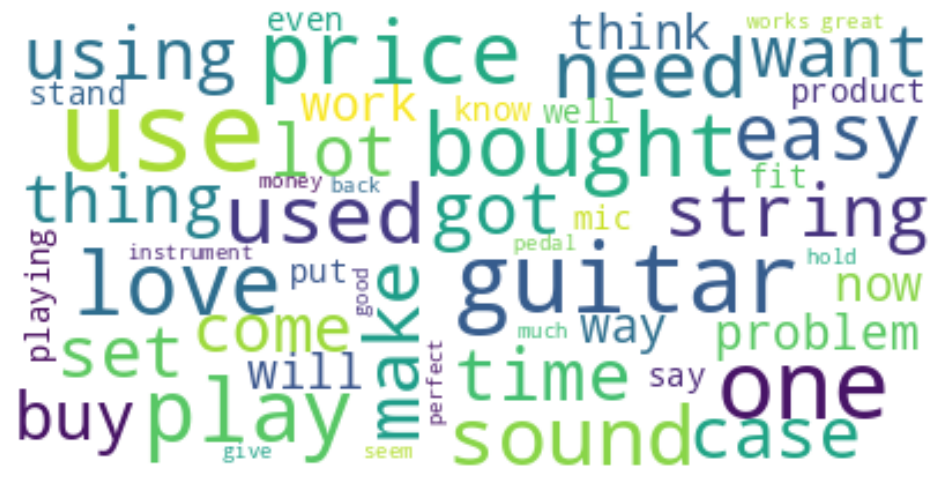

In [12]:
# Ejecuto la funcion de wordcloud (tarda en ejecutarse unos 4 min)

plot_word_cloud(music_df['reviewText'])

In [13]:
# Ahora descargo el dataframe para realizar el preprocesamiento en otro notebook.

music_df.to_csv('/content/drive/MyDrive/music_df_full.csv', index=False)


Conclusion: He tenido que descargar el archivo de reviews completo, porque el 5-core tenia 1/5 de la información y palabras que no correspondian con el analisis de sentimiento de las reviews de instrumentos musicales. En cambio este archivo de reviews si esta mas enfocado a las reviews de intrumentos musicales. Hemos visto la cardinalidad de dataframe, he graficado las reviews por puntuación predominando las 5 estrellas. Vimos un wordcloud con muchas palabras que tienen informacion como otras que seran irrelevantes para nuestro análisis.